In [35]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

Не забудьте скачать [данные](https://1drv.ms/u/c/a320c9b39dd5bde2/EZXNB1leZnRFpsAYSpmz0_cBlmmT4FbiKxcwov1ehM5d6Q): в директории `./data/` должны находиться файлы `users.csv`, `appeals.csv`, `navigation.csv`

In [36]:
users = pd.read_csv("./data/users.csv")

In [37]:
users['user_id'] = users['user_id'].astype('int64')
users['registration_dt'] = pd.to_datetime(users['registration_dt'])
users['role'] = users['role'].fillna('unknown')
users = users.dropna()
users.head()

,user_id,role,registration_dt,age,is_admin,have_appeal
0,6940224927,teacher,2023-12-19,89,0,1
1,7020640287,unknown,2024-02-18,27,0,1
2,6871731318,teacher,2024-02-29,61,0,1
3,7604960886,unknown,2024-02-01,90,0,1
4,85915566,student,2024-02-29,73,0,1


In [38]:
# Устанавливаем разумные границы возраста
# Рассматриваем только тех, кто обращался в поддержку
users = users[(users['age'] > 0) & (users['age'] < 100) & (users['have_appeal'] == 1)]

In [39]:
month_min = pd.to_datetime(users["registration_dt"].dt.strftime("%Y-%m")).min() + pd.DateOffset(months=1)

In [40]:
month_max = pd.to_datetime(users["registration_dt"].dt.strftime("%Y-%m")).max()

In [41]:
users = users[(users["registration_dt"] >= month_min) & (users["registration_dt"] < month_max)]

In [42]:
users['registration_dt'] = pd.to_datetime(users['registration_dt'])

In [43]:
users["registration_date"] = pd.to_datetime(users["registration_dt"].dt.strftime("%Y-%m-%d"))

In [44]:
# Месяц, в котором произошла регистрация
users['registration_month'] = pd.to_datetime(users['registration_date'].dt.strftime("%Y-%m"))

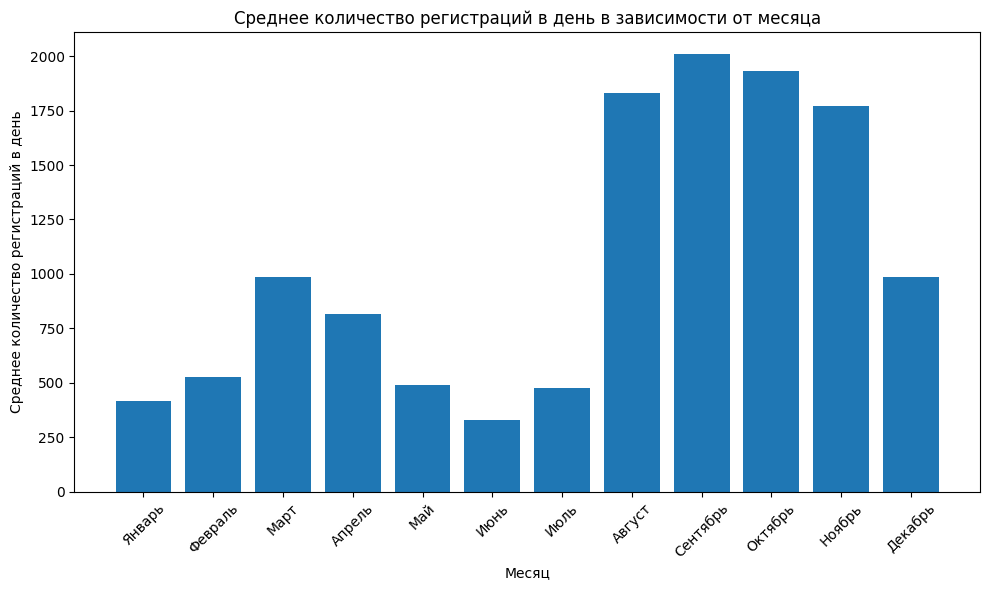

In [45]:
# Среднее количество регистраций в день в зависимости от месяца
# Т.к. по некоторым месяцам у нас данные неполные, то будем строить графики для
# среднего количества регистраций в день (а не общее количество регистраций в этом месяце)

users["month"] = users["registration_date"].dt.month
monthly_avg = users.groupby("month")["registration_date"].agg(lambda x: x.value_counts().mean()).sort_index()
month_names = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 
               'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
plt.figure(figsize=(10, 6))
plt.bar(month_names, monthly_avg)
plt.xlabel('Месяц')
plt.ylabel('Среднее количество регистраций в день')
plt.title("Среднее количество регистраций в день в зависимости от месяца")
plt.xticks(rotation=45)

plt.tight_layout()

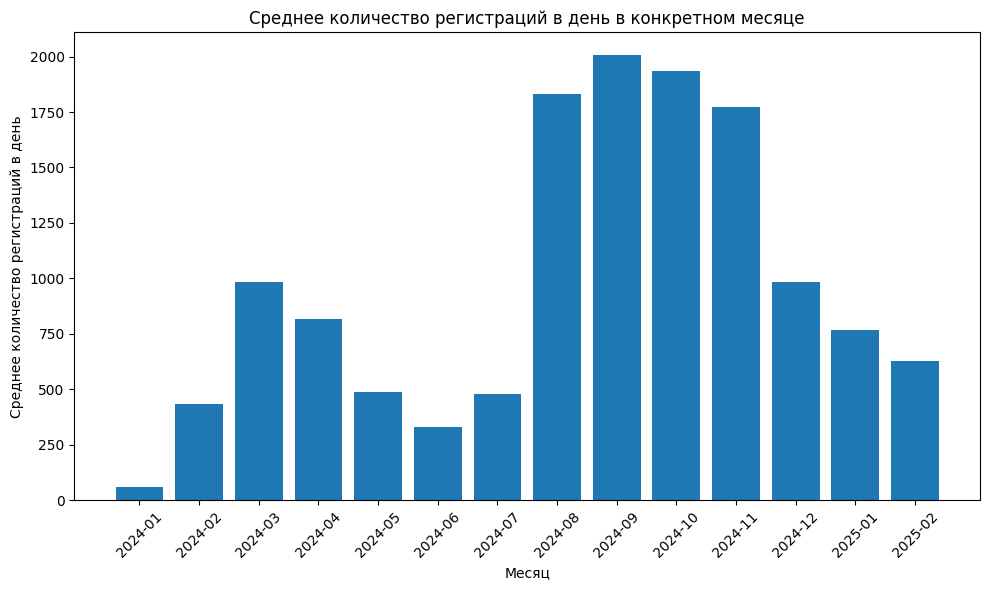

In [46]:
# Среднее количество регистраций в день в конкретном месяце
# Bar-версия
# Т.к. по некоторым месяцам у нас данные неполные, то будем строить графики для
# среднего количества регистраций в день (а не общее количество регистраций в этом месяце)

users["M"] = users["registration_date"].dt.strftime("%Y-%m")
M_avg = users.groupby("M")["registration_date"].agg(lambda x: x.value_counts().mean()).sort_index()
plt.figure(figsize=(10, 6))
plt.bar(M_avg.index, M_avg.values)
plt.xlabel('Месяц')
plt.ylabel('Среднее количество регистраций в день')
plt.title('Среднее количество регистраций в день в конкретном месяце')
plt.xticks(rotation=45)

plt.tight_layout()

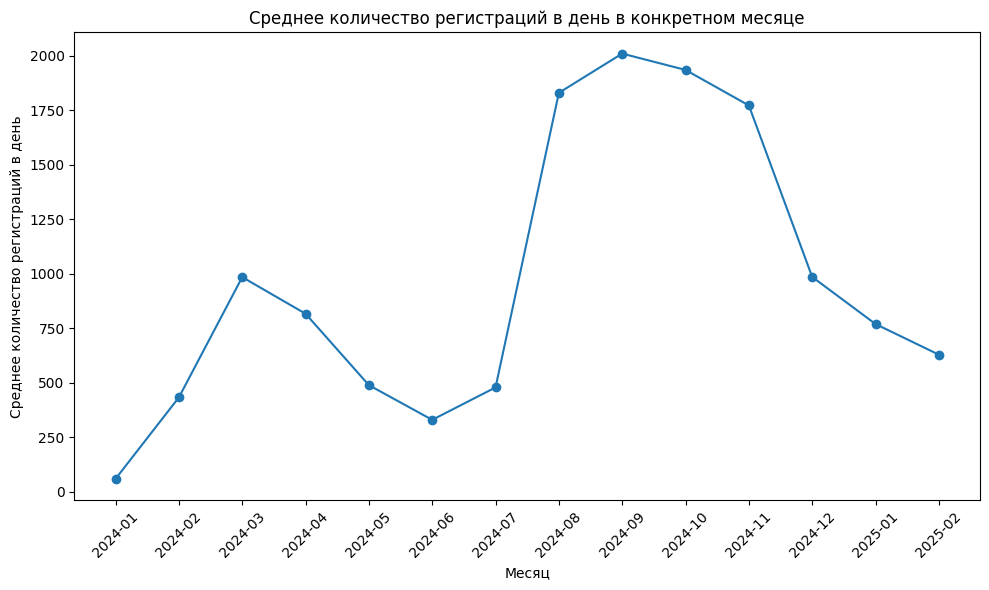

In [47]:
# Среднее количество регистраций в день в конкретном месяце
# Plot-версия
# Т.к. по некоторым месяцам у нас данные неполные, то будем строить графики для
# среднего количества регистраций в день (а не общее количество регистраций в этом месяце)

users["M"] = users["registration_date"].dt.strftime("%Y-%m")
M_avg = users.groupby("M")["registration_date"].agg(lambda x: x.value_counts().mean()).sort_index()
plt.figure(figsize=(10, 6))
plt.plot(M_avg.index, M_avg.values, marker='o', linestyle='-')
plt.xlabel('Месяц')
plt.ylabel('Среднее количество регистраций в день')
plt.title('Среднее количество регистраций в день в конкретном месяце')
plt.xticks(rotation=45)

plt.tight_layout()

Text(0, 0.5, 'Количество')

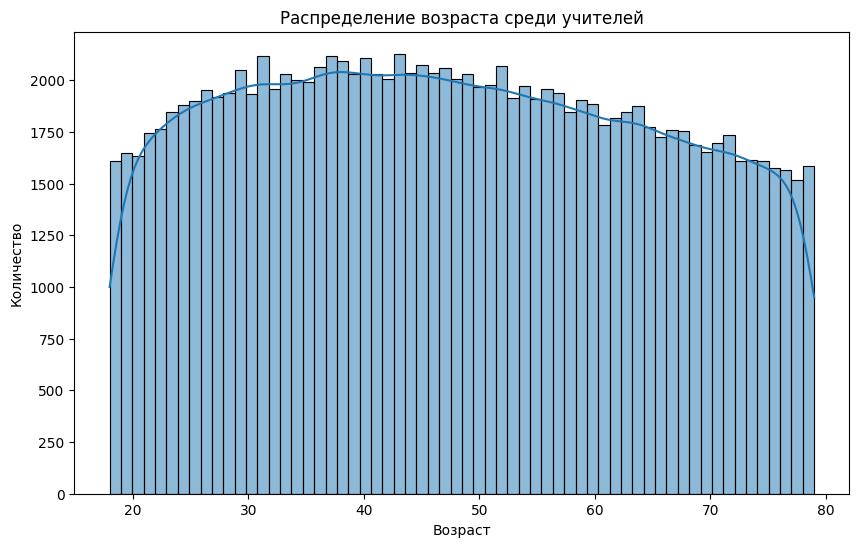

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(data=users[(users['role'] == 'teacher') & (users['age'] >= 18) & (users['age'] < 80)], bins=80-18, x='age', kde=True)
plt.title('Распределение возраста среди учителей')
plt.xlabel('Возраст')
plt.ylabel('Количество')

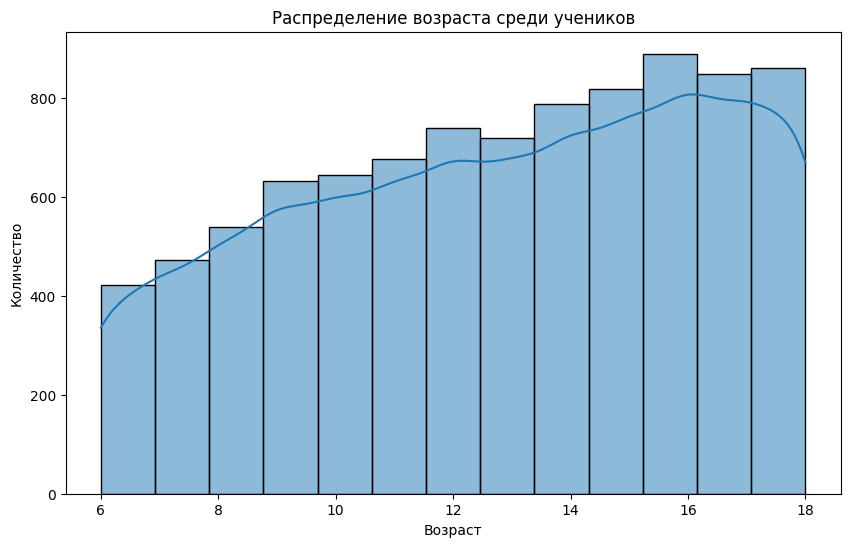

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(data=users[(users['role'] == 'student') & (users['age'] >= 6) & (users['age'] <= 18)], x='age', bins=13, kde=True)
plt.title('Распределение возраста среди учеников')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

In [50]:
print("Распределение по возрасту среди учеников")
print(users[(users['role'] == 'student') & (users['age'] >= 6) & (users['age'] <= 18)]['age'].value_counts().sort_index())

Распределение по возрасту среди учеников
age
6     421
7     472
8     538
9     632
10    643
11    677
12    738
13    719
14    788
15    817
16    889
17    849
18    861
Name: count, dtype: int64


In [51]:
print(f"Средний возраст среди учителей: {round(users[(users['role'] == 'teacher') & (users['age'] >= 18) & (users['age'] < 80)]['age'].mean())} лет")
print(f"Средний возраст среди учеников: {round(users[(users['role'] == 'student') & (users['age'] >= 6) & (users['age'] <= 18)]['age'].mean())} лет")

Средний возраст среди учителей: 48 лет
Средний возраст среди учеников: 13 лет
